In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from tools.demo_model import load_model
from tools.util import * #load_img, resize_img, preprocess_img, postprocess_tens

In [3]:
from tools.model import Model
import torch.nn as nn
from tools.util import display

In [7]:
img_path = 'images/000000289938.jpg'

# Inference on single image

In [5]:
model = load_model()

In [8]:
img = load_img(img_path)
(tens_l_orig, tens_l_rs, img_lab_orig) = preprocess_img(img, HW=(256,256))

# colorizer outputs 256x256 ab map
# resize and concatenate to original L channel
img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
out_img = postprocess_tens(tens_l_orig, model(tens_l_rs).cpu())


/dvmm-filer2/users/zhiyuan/dvmm-filer2/users/zhiyuan/anaconda3/envs/FewShot/lib/python3.9/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/dvmm-filer2/users/zhiyuan/dvmm-filer2/users/zhiyuan/anaconda3/envs/FewShot/lib/python3.9/site-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 319 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


(-0.5, 639.5, 425.5, -0.5)

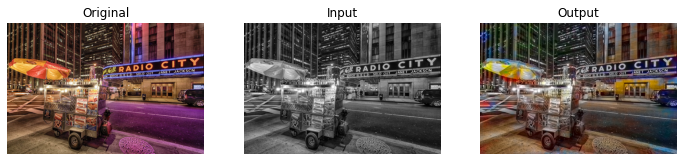

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_bw)
plt.title('Input')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(out_img)
plt.title('Output')
plt.axis('off')